# Import Libraries/modules

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline
from scipy.stats import f_oneway

# load the dataset in panda dataframe

In [2]:
#import the 311_Service_Requests_from_2010_to_Present dataset CSV into the panda dataframe#

csr_dataframe = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

# Task 1. Understand the dataset

### 1. Identify the shape of the dataset

In [3]:
csr_dataframe.shape

(364558, 53)

       In the given dataset there are '364558' rows and '53' columns.

In [4]:
#check column names
csr_dataframe.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
#check indexes
csr_dataframe.index

RangeIndex(start=0, stop=364558, step=1)

In [6]:
#Undrstand data set information
csr_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [7]:
# understand sample data
csr_dataframe.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 2. Identify variables with null values

In [8]:
# method 1 - solution

''' isnull function along with sum function can Find columns with Null values and their respective count
here in output non 0 value denotes the no of null values a column is having'''

csr_dataframe.isnull().sum(axis = 0)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [9]:
# method 2
#Below code can also be used to find only those columns columns which have null values,

print("Below are the columns having null data : \n", csr_dataframe.columns[csr_dataframe.isnull().any()].tolist())
print("\n total no of columns : ", len(csr_dataframe.columns))
print("total no of columns having null data : ", len(csr_dataframe.columns[csr_dataframe.isnull().any()]))
print("total no of not null data columns :", len(csr_dataframe.columns[csr_dataframe.notnull().all()]))

Below are the columns having null data : 
 ['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Due Date', 'Resolution Action Updated Date', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'School Region', 'School Code', 'School Zip', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location']

 total no of columns :  53
total no of columns having null data :  35
total no of not null data columns : 18



* From above we can see that, there are total of 53 columns in the dataset
* out of which 35 has atleast 1 null record and 18 columns have no null records 


# Task 2. Perform basic data exploratory analysis:

###### For the EASE of analysis - Replace the special Characters in the Dataframe

In [10]:
csr_dataframe.columns = csr_dataframe.columns.str.replace(" ","_")

In [11]:
csr_dataframe.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

### 1. Utilize missing value treatment

* Below from point 'a' to 'e', Utilize missing value treatment is done:
    * a. Find and drop columns having all Null data
    * b. Find and drop columns having most (85%) of the NULL data
    * c. Some columns in the data aren't just useful for this project requirement and analysis, its best to drop these columns 
    * d. Closed date, Latitude and Longitude have missing values, best to remove the rows where data in those columns are missing
    * e. Impute the NA value with Unknown City

###### a.  Find and drop columns having all Null data

In [12]:
#Find columns with all nul records
print("Below columns does not have any data/ (all rows are null) : \n \n", csr_dataframe.columns[csr_dataframe.isnull().all()])

#remove above columns having all null records
csr_dataframe.dropna(axis= 1 , how='all', inplace=True)

#print the shape of the dataframe
print("\n After treatment shape of the dataframe is : \n",csr_dataframe.shape)


Below columns does not have any data/ (all rows are null) : 
 
 Index(['School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Garage_Lot_Name'],
      dtype='object')

 After treatment shape of the dataframe is : 
 (364558, 48)



* There is no data for column 'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location', 'Garage_Lot_Name'
* These columns are dropped.

###### b. Find and drop columns having most of the NULL data

In [13]:
#taken 85% but this value is uaully discussed with business before removing of the columns

#Find column having mostly the NULL data
most_Null_data = [i for i in csr_dataframe.columns if csr_dataframe[i].isnull().sum() > 0.85*len(csr_dataframe)]

print("Column having mostly the NULL data :\n \n", most_Null_data)

#drop columns having mostly the NULL data
csr_dataframe.drop(columns = most_Null_data, inplace=True)


#print the shape of the dataframe
print("\n After treatment shape of the dataframe is : \n",csr_dataframe.shape)

Column having mostly the NULL data :
 
 ['Intersection_Street_1', 'Intersection_Street_2', 'Landmark', 'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment', 'Ferry_Direction', 'Ferry_Terminal_Name']

 After treatment shape of the dataframe is : 
 (364558, 39)


* most of the data is null for columns 'Intersection_Street_1', 'Intersection_Street_2', 'Landmark', 'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment', 'Ferry_Direction', 'Ferry_Terminal_Name'
* these columns are dropped

##### c. some columns in the data aren't just useful to this analysis, its best to remove these columns

In [14]:
# A list of columns to remove from the dataframe
unwanted_column_list = ['Agency_Name',  'Descriptor', 'Location_Type', 'Incident_Zip','Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2','Address_Type', 'Facility_Type', 'Status', 'Due_Date', 'Resolution_Description', 'Resolution_Action_Updated_Date','Community_Board', 'X_Coordinate_(State_Plane)','Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough','School_Name', 'School_Number', 'School_Region', 'School_Code','School_Phone_Number', 'School_Address', 'School_City', 'School_State','School_Zip', 'School_Not_Found', 'Location']

#Drop columns of above list
csr_dataframe.drop(unwanted_column_list, inplace=True, axis=1)

#print the shape of the dataframe
print("\n After treatment shape of the dataframe is : \n",csr_dataframe.shape)


 After treatment shape of the dataframe is : 
 (364558, 9)


In [15]:
csr_dataframe.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Complaint_Type',
       'City', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

##### d. Closed date, Latitude, and Longitude all have missing values, best to remove the rows where data in those columns are missing


In [16]:
csr_dataframe = csr_dataframe[(csr_dataframe['Latitude'].notnull())& (csr_dataframe['Longitude'].notnull()) & (csr_dataframe['Closed_Date'].notnull())]

#print the shape of the dataframe
print("\n After treatment shape of the dataframe is : \n",csr_dataframe.shape)


 After treatment shape of the dataframe is : 
 (360470, 9)


In [17]:
csr_dataframe[['Closed_Date','Created_Date']].isnull().sum()

Closed_Date     0
Created_Date    0
dtype: int64

##### e. Impute the NA value with Unknown City

* Since no of Nulls are more filling up Na cities with most frequest occurred city won't be good option
* It is better to impute the NA with Unknown city


In [18]:
# impute the NA value with Unknown City
csr_dataframe['City'].fillna('Unknown City', inplace=True)

#print the shape of the dataframe
print("\n After treatment shape of the dataframe is : \n",csr_dataframe.shape)

csr_dataframe[['City', 'Complaint_Type']].isnull().sum()


 After treatment shape of the dataframe is : 
 (360470, 9)


City              0
Complaint_Type    0
dtype: int64

In [19]:
csr_dataframe.isnull().sum(axis = 0)

Unique_Key        0
Created_Date      0
Closed_Date       0
Agency            0
Complaint_Type    0
City              0
Borough           0
Latitude          0
Longitude         0
dtype: int64

### 2. Analyze the date column and remove the entries if it has an incorrect timeline

    * Created Date, Closed Date,Resolution Action Updated Date, Due Date are the Date columns
    
        * 1. Created Date : No Null data
        * 2. Closed Date : row having null data is already removed in above steps
        * 3. Resolution Action Updated Date : column is irrelevant hence already remove in above steps
        * 2. Due Date are the Date columns  : column is irrelevant hence already remove in above steps

* Column 'Created Date' and 'Closed Date' will to be converted into datetime datatype
* For column 'Created Date' and 'Closed Date' rows having null data will be removed.
* New column 'Request_Closing_Time' will be created which will be the difference of 'Closed Date' and 'Created Date'.

In [20]:
#correct the datatype of Date columns

#Datatype of Date columns
print("Datatype of Date columns before treatment : \n", csr_dataframe[['Created_Date','Closed_Date']].dtypes)

#First convert the Date columns which are of object type into the Date format
csr_dataframe['Created_Date'] = pd.to_datetime(csr_dataframe['Created_Date'],format='%m/%d/%Y %I:%M:%S %p' , errors='coerce',infer_datetime_format=True)
csr_dataframe['Closed_Date'] = pd.to_datetime(csr_dataframe['Closed_Date'],format='%m/%d/%Y %I:%M:%S %p' , errors='coerce',infer_datetime_format=True)

print("\n Datatype of Date columns After treatment : \n", csr_dataframe[['Created_Date','Closed_Date']].dtypes)


Datatype of Date columns before treatment : 
 Created_Date    object
Closed_Date     object
dtype: object

 Datatype of Date columns After treatment : 
 Created_Date    datetime64[ns]
Closed_Date     datetime64[ns]
dtype: object


In [21]:
#Find response time

csr_dataframe['Request_Closing_Time'] = (csr_dataframe['Closed_Date'].values - csr_dataframe['Created_Date'].values)
csr_dataframe['Request_Closing_Time_mins'] = csr_dataframe['Request_Closing_Time']/np.timedelta64(1,'m')


In [22]:
# Get the statistical information

csr_dataframe['Request_Closing_Time_mins'].describe()

count    360470.000000
mean        251.344535
std         349.555692
min           1.016667
25%          75.483333
50%         160.066667
75%         314.029167
max       35572.366667
Name: Request_Closing_Time_mins, dtype: float64

### Outlier identification and verification/removal of Date data which is not in timeline is done in last section of this notebook . Please refer last section






### 3. Draw a frequency plot for city-wise complaints

* First create a dataset having cities and respective count of complaints (basically group by city)
* Then draw a frequency plot for city-wise complaints (This will be hitogram plot) 

In [23]:
#Check the count of complaints city wise 
a = pd.DataFrame({'Count of complaints Citywise' : csr_dataframe.groupby('City')['Complaint_Type'].size()})
a.sort_values( by = 'Count of complaints Citywise', ascending = False)

,Count of complaints Citywise
City,
BROOKLYN,118632
NEW YORK,76634
BRONX,49048
STATEN ISLAND,15326
JAMAICA,8920
ASTORIA,7974
FLUSHING,7481
RIDGEWOOD,6388
CORONA,5382


In [24]:
csr_dataframe.reset_index(drop=True)

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,City,Borough,Latitude,Longitude,Request_Closing_Time,Request_Closing_Time_mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,Noise - Street/Sidewalk,NEW YORK,MANHATTAN,40.865682,-73.923501,0 days 00:55:30,55.500000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,Blocked Driveway,ASTORIA,QUEENS,40.775945,-73.915094,0 days 01:27:13,87.216667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,Blocked Driveway,BRONX,BRONX,40.870325,-73.888525,0 days 04:51:34,291.566667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,Illegal Parking,BRONX,BRONX,40.835994,-73.828379,0 days 07:45:27,465.450000
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,Illegal Parking,ELMHURST,QUEENS,40.733060,-73.874170,0 days 03:27:44,207.733333
...,...,...,...,...,...,...,...,...,...,...,...
360465,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,Illegal Parking,WOODHAVEN,QUEENS,40.695145,-73.860949,0 days 10:17:47,617.783333
360466,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,Noise - Vehicle,BRONX,BRONX,40.867830,-73.907178,0 days 02:20:34,140.566667
360467,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,Noise - Street/Sidewalk,NEW YORK,MANHATTAN,40.821647,-73.950873,0 days 00:19:03,19.050000
360468,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,Blocked Driveway,BRONX,BRONX,40.886361,-73.853290,0 days 02:40:53,160.883333


#### Visualize

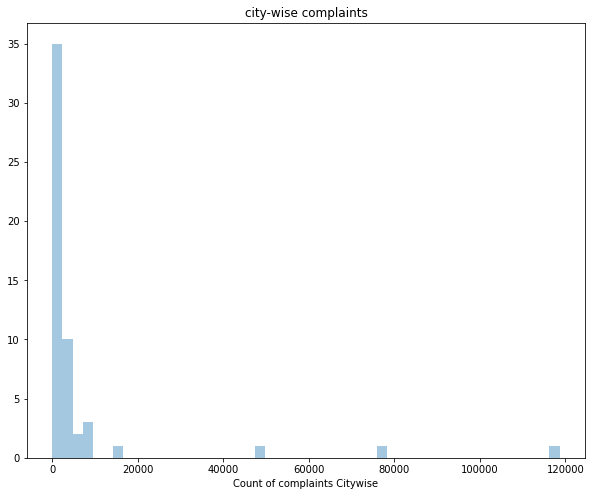

In [25]:
# Visualization of frequency plot for city-wise complaints - solution 1

plt.figure(figsize=(10,8))

sns.distplot(a['Count of complaints Citywise'], kde=False)
plt.xlabel("Count of complaints Citywise")
plt.title('city-wise complaints')
plt.show()


* Here frequencty plot using distplot is not very useful
* countplot show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
* hence below countplot can be used to visualize the frequency distribution of city-wise complaints

<AxesSubplot:title={'center':'city-wise complaints'}, xlabel='count', ylabel='City'>

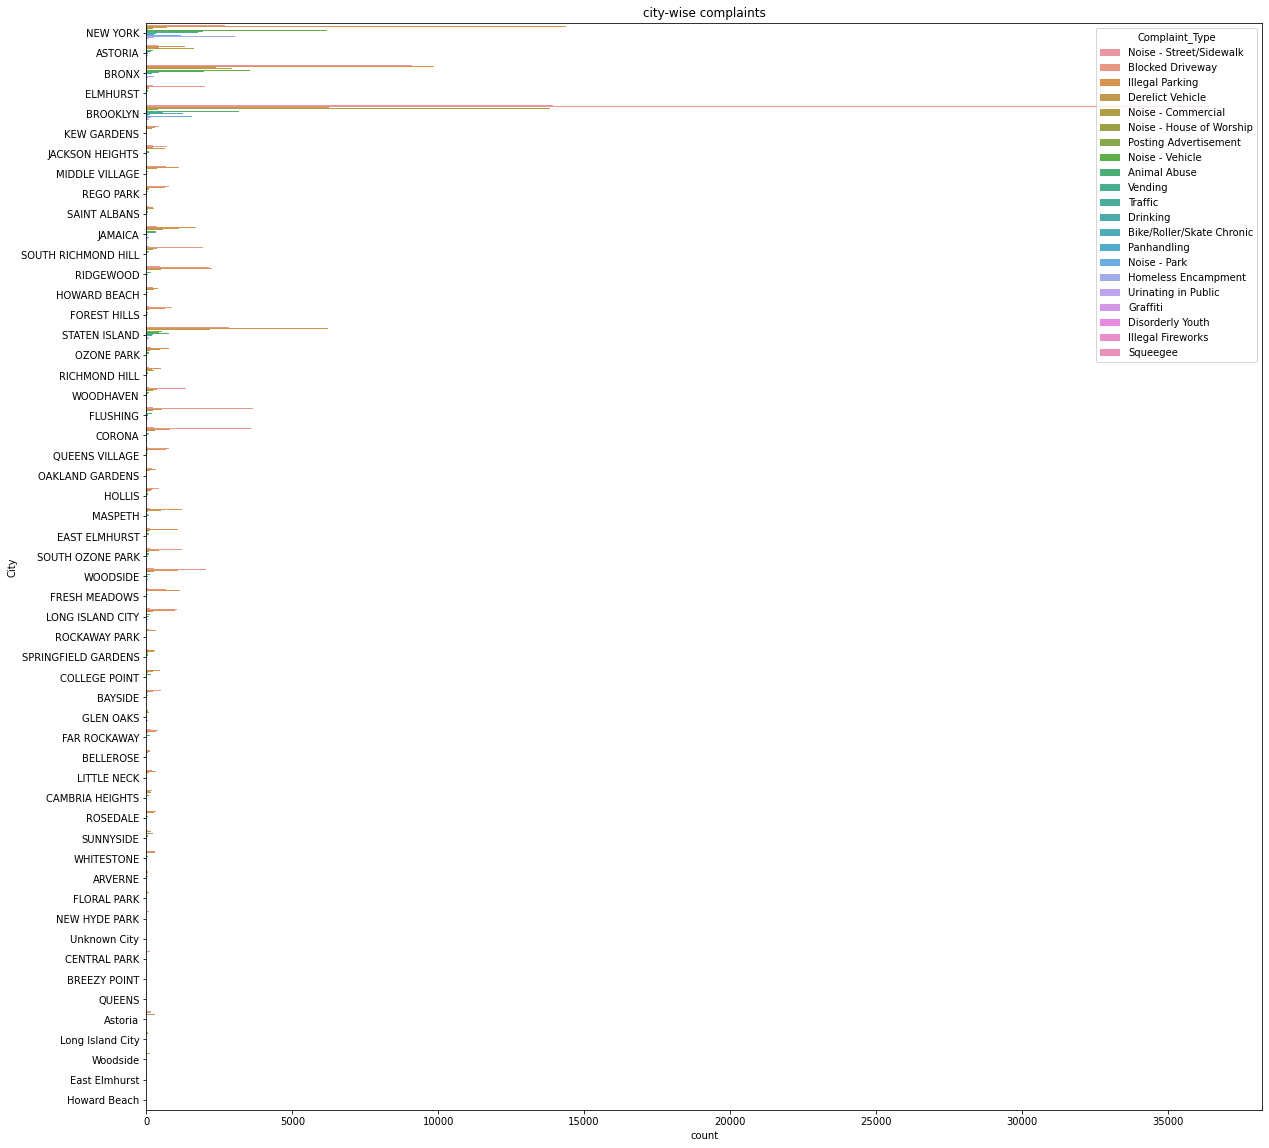

In [26]:
# Visualization of frequency plot for city-wise complaints - solution 2

plt.figure(figsize=(20,20))
plt.title('city-wise complaints')
sns.countplot(y="City",data=csr_dataframe,hue = 'Complaint_Type')

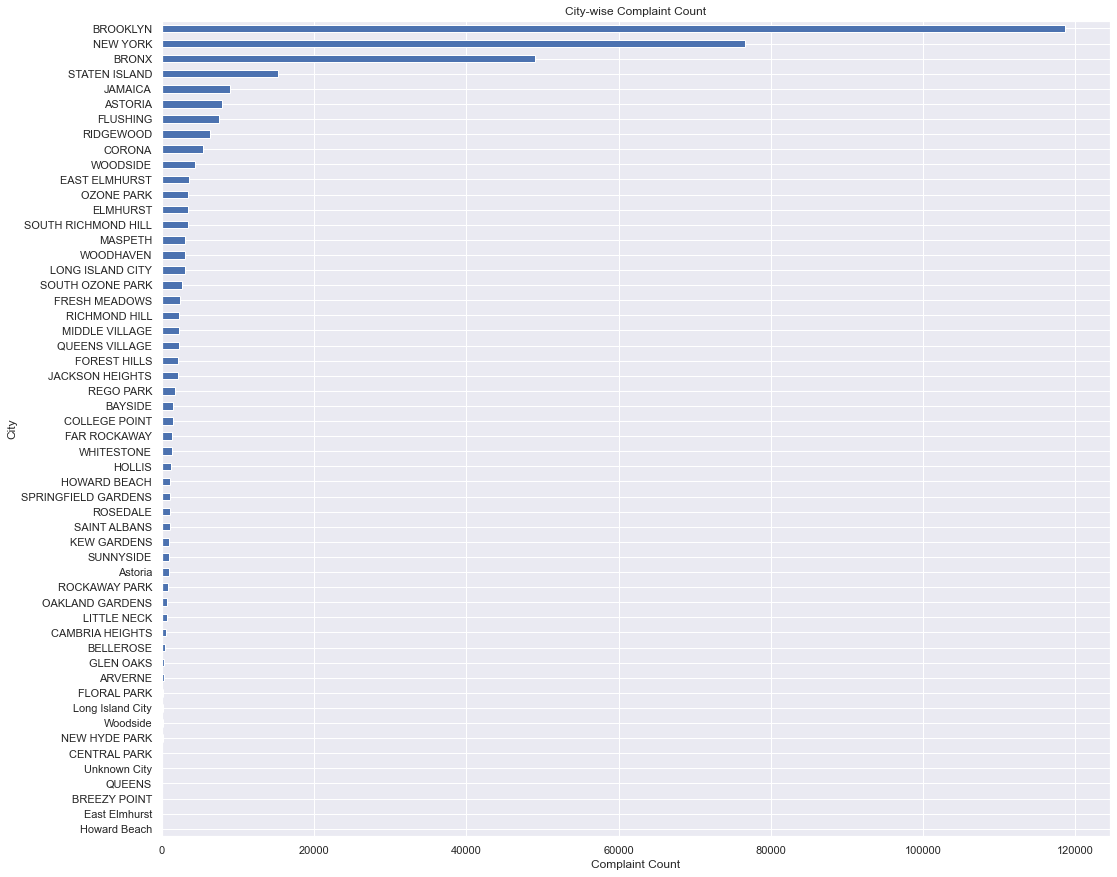

In [27]:
#city-wise complaints (base on city)

sns.set()
csr_dataframe['City'].value_counts().sort_values(ascending= True).plot(kind= 'barh', figsize=(17,15), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

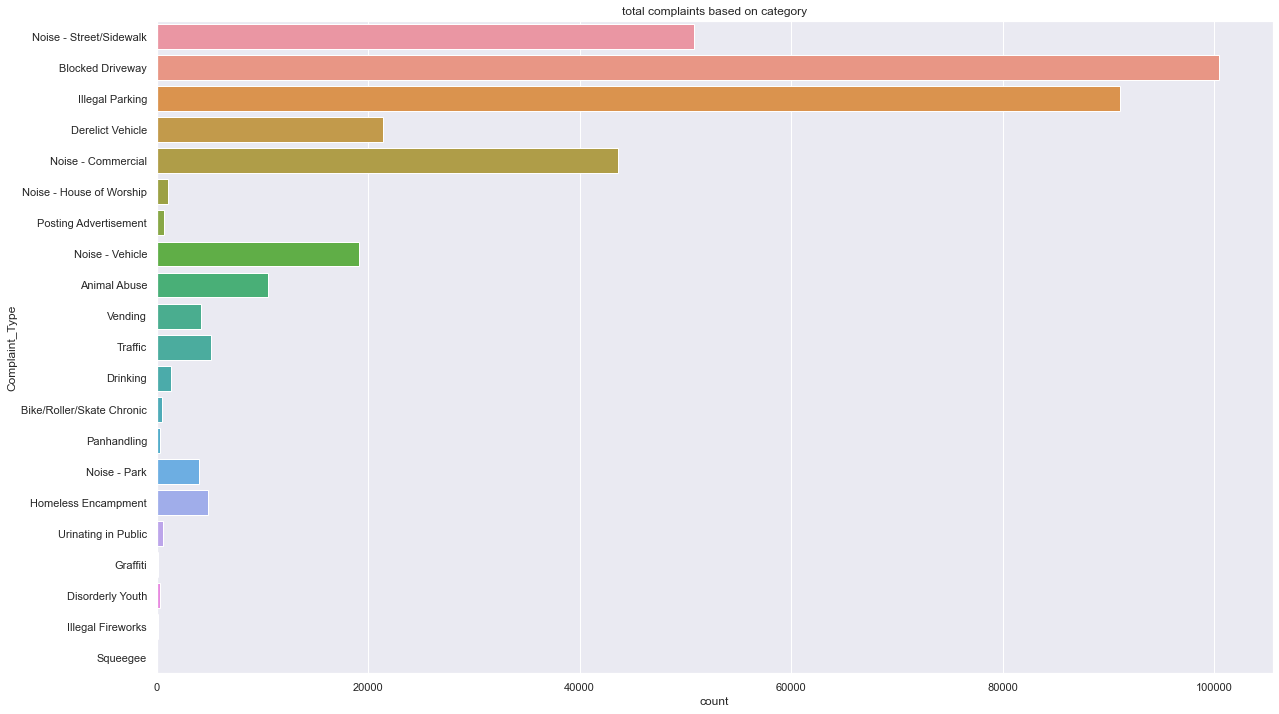

In [28]:
#total complaints based on category

plt.figure(figsize=(20,12))
plt.title('total complaints based on category')
sns.countplot(y= "Complaint_Type",data=csr_dataframe)
plt.show()

#### Conclusion - Above graphs shows that:
     *  1. City 'BROOKLYN' has highest complaint types
     *  2. maximum complaints exists for complaint type 'Blocked Driveway'

### 4. Draw scatter and hexbin plots for complaint concentration across Brooklyn   


#### Notes- Based on the domain knowledge

* In dataset Brooklyn is present in both City and Borough
* but since 1898 Brooklyn is not considered as a City but as a Borough - Refer - https://en.wikipedia.org/wiki/Brooklyn
* hence the scatter and hexbin plots should be based on the Borough column not on the City column, Brooklyn is a borough not a city

In [29]:
#First make a dataset:
df_Brooklyn_Borough = csr_dataframe[csr_dataframe['Borough']=='BROOKLYN']
df_Brooklyn_Borough.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Complaint_Type,City,Borough,Latitude,Longitude,Request_Closing_Time,Request_Closing_Time_mins
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,Illegal Parking,BROOKLYN,BROOKLYN,40.660823,-73.992568,0 days 01:53:41,113.683333
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,Blocked Driveway,BROOKLYN,BROOKLYN,40.623793,-73.999539,0 days 01:23:42,83.700000
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,Illegal Parking,BROOKLYN,BROOKLYN,40.687511,-73.874505,0 days 08:30:49,510.816667
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,Noise - Commercial,BROOKLYN,BROOKLYN,40.679154,-73.983430,0 days 00:51:18,51.300000
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,Noise - Commercial,BROOKLYN,BROOKLYN,40.616550,-73.930202,0 days 02:56:29,176.483333


In [30]:
df_Brooklyn_Borough['Complaint_Type'].value_counts()

Blocked Driveway             36431
Illegal Parking              33461
Noise - Street/Sidewalk      13943
Noise - Commercial           13848
Derelict Vehicle              6246
Noise - Vehicle               5933
Animal Abuse                  3186
Noise - Park                  1558
Traffic                       1255
Homeless Encampment            939
Vending                        575
Noise - House of Worship       387
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      121
Disorderly Youth                79
Graffiti                        60
Illegal Fireworks               60
Posting Advertisement           58
Panhandling                     48
Name: Complaint_Type, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


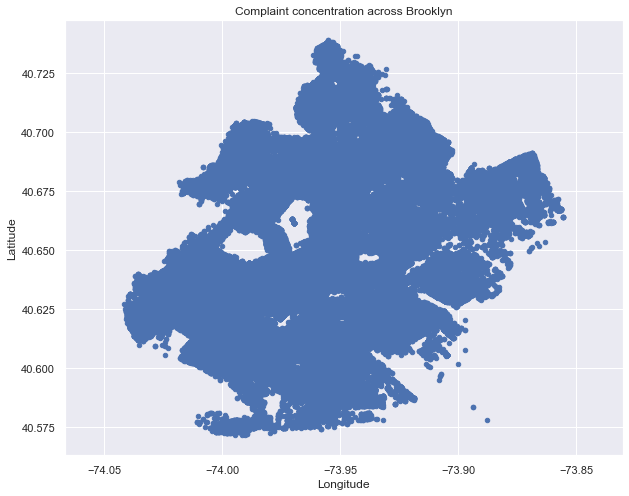

In [31]:
#Complaint concentration across Brooklyn

#1. Using Scatter plot

df_Brooklyn_Borough[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaint concentration across Brooklyn').axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### observation - 

* Here Scatter plot is not providing much inights and it is inconclusive
* hexbin will be better indicator.

(-74.05061403048781, -73.8464793432815, 40.563150823850876, 40.74729501421672)

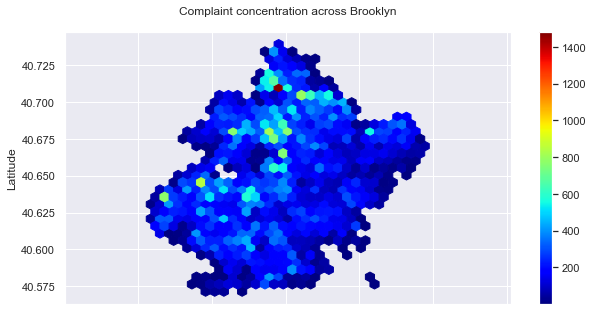

In [32]:
#2. Using hexbins - Used both 'matplot' as well as 'seaborn' method

df_Brooklyn_Borough.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=30,
    colormap = 'jet',mincnt=1,title = 'Complaint concentration across Brooklyn\n', figsize=(10,5)).axis('equal')

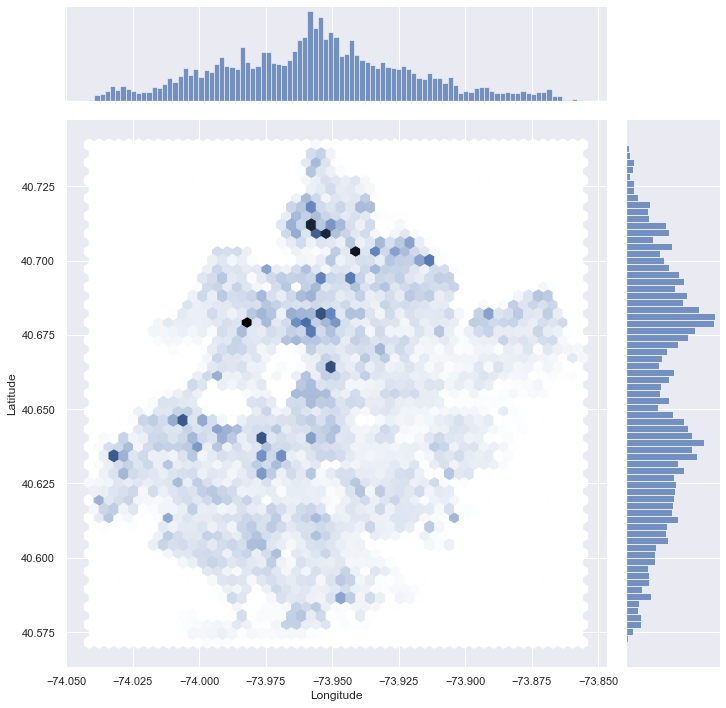

In [33]:
sns.jointplot(data =df_Brooklyn_Borough ,  x='Longitude', y='Latitude',  kind = 'hex',height=10)

#### Conclusion - 

* Complaints are scattered all over the Brooklyn Borough in the range of latitude and longitude of (-74.05061403048781, -73.8464793432815, 40.563150823850876, 40.74729501421672)

# Task 3. Find major types of complaints

#### Major types of complaints on the cleaned data

In [34]:
major_complaints = csr_dataframe['Complaint_Type']

print("unique major complaints : \n \n", major_complaints.unique())
print("\n No of unique major complaints : \n", major_complaints.nunique())

unique major complaints : 
 
 ['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Squeegee']

 No of unique major complaints : 
 21


In [35]:
major_complaints.value_counts()

Blocked Driveway             100493
Illegal Parking               91095
Noise - Street/Sidewalk       50823
Noise - Commercial            43640
Derelict Vehicle              21427
Noise - Vehicle               19125
Animal Abuse                  10503
Traffic                        5169
Homeless Encampment            4830
Vending                        4164
Noise - Park                   3995
Drinking                       1400
Noise - House of Worship       1061
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       463
Panhandling                     320
Disorderly Youth                314
Illegal Fireworks               167
Graffiti                        157
Squeegee                          4
Name: Complaint_Type, dtype: int64

### 1. Plot a bar graph of count vs. complaint types


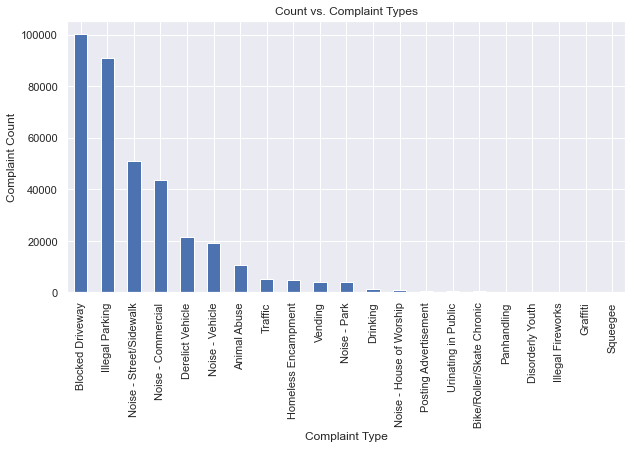

In [36]:
x=major_complaints.value_counts()
plt.figure(figsize=(10,5))
x.plot(kind = 'bar' , title = "Count vs. Complaint Types" , xlabel = 'Complaint Type' , ylabel ='Complaint Count')
plt.show()

#### Conclusion - 

* Maximum number of complainsts are occurring for complaint type = 'Blocked Driveway'


##### Lets Check the frequency of various types of complaints for New York city and Brooklyn  

In [37]:
csr_dataframe.loc[csr_dataframe['City']== 'NEW YORK']['Complaint_Type'].value_counts()

Noise - Street/Sidewalk      22081
Noise - Commercial           18668
Illegal Parking              14368
Noise - Vehicle               6179
Homeless Encampment           3021
Blocked Driveway              2687
Vending                       2620
Animal Abuse                  1926
Traffic                       1751
Noise - Park                  1200
Derelict Vehicle               688
Drinking                       320
Urinating in Public            264
Bike/Roller/Skate Chronic      249
Noise - House of Worship       217
Panhandling                    203
Disorderly Youth                80
Posting Advertisement           49
Illegal Fireworks               34
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

In [38]:
csr_dataframe.loc[csr_dataframe['City']== 'BROOKLYN']['Complaint_Type'].value_counts()

Blocked Driveway             36431
Illegal Parking              33461
Noise - Street/Sidewalk      13944
Noise - Commercial           13848
Derelict Vehicle              6245
Noise - Vehicle               5933
Animal Abuse                  3186
Noise - Park                  1558
Traffic                       1253
Homeless Encampment            939
Vending                        575
Noise - House of Worship       387
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      121
Disorderly Youth                79
Graffiti                        60
Illegal Fireworks               60
Posting Advertisement           58
Panhandling                     48
Name: Complaint_Type, dtype: int64

### 2. Find the top 10 complaint types 


In [39]:
major_complaints.value_counts().nlargest(10).index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending'],
      dtype='object')

In [40]:
major_complaints.value_counts().nlargest(10)

Blocked Driveway           100493
Illegal Parking             91095
Noise - Street/Sidewalk     50823
Noise - Commercial          43640
Derelict Vehicle            21427
Noise - Vehicle             19125
Animal Abuse                10503
Traffic                      5169
Homeless Encampment          4830
Vending                      4164
Name: Complaint_Type, dtype: int64

##### Display the major complaint types and their count


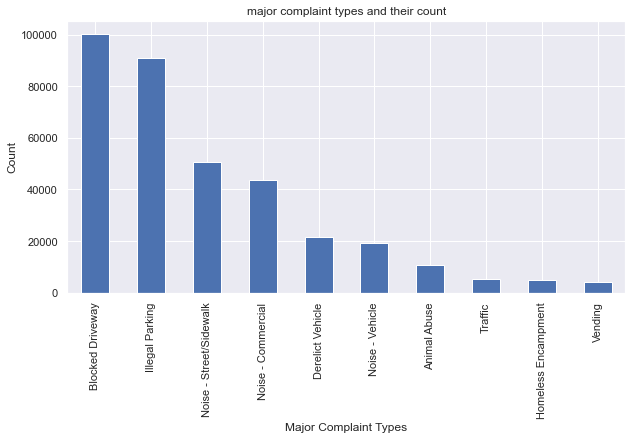

In [41]:
y=major_complaints.value_counts().nlargest(10)
plt.figure(figsize=(10,5))
y.plot(kind = 'bar' , title = "major complaint types and their count" , xlabel = 'Major Complaint Types' , ylabel ='Count')
plt.show()

### 3. Display the types of complaints in each city in a separate dataset

In [42]:
city_complaint_dataset = pd.DataFrame({"Count": csr_dataframe.groupby(["City","Complaint_Type"]).size()}).reset_index()
city_complaint_dataset.sort_values("Count", ascending = False)

,City,Complaint_Type,Count
105,BROOKLYN,Blocked Driveway,36431
112,BROOKLYN,Illegal Parking,33461
468,NEW YORK,Noise - Street/Sidewalk,22081
465,NEW YORK,Noise - Commercial,18668
85,BRONX,Blocked Driveway,17052
...,...,...,...
382,KEW GARDENS,Vending,1
515,QUEENS,Noise - House of Worship,1
551,REGO PARK,Urinating in Public,1
164,CORONA,Panhandling,1


# Task 4. Visualize the major types of complaints in each city

* First create the Dataframe
* Next create the stacked bar chart
* stacked bar chart shows the types of complaints in each city in a single chart, where diffrent colors show the different types of complaints

In [43]:
# create a list of major Complaint Types

major_complaint_list=major_complaints.value_counts().nlargest(10).index.to_list()
major_complaint_list

['Blocked Driveway',
 'Illegal Parking',
 'Noise - Street/Sidewalk',
 'Noise - Commercial',
 'Derelict Vehicle',
 'Noise - Vehicle',
 'Animal Abuse',
 'Traffic',
 'Homeless Encampment',
 'Vending']

In [44]:
# Create a Dataset where for only 'major type of complaints' and corresponding City name 

city_major_complaint_dataset = pd.DataFrame()
for ct in major_complaint_list:
    city_major_complaint_dataset[ct]=csr_dataframe[csr_dataframe['Complaint_Type']==ct]['City'].value_counts()

#city_major_complaint_dataset = csr_dataframe.groupby(['City','Complaint Type']).size().unstack()
#city_major_complaint_dataset = city_major_complaint_dataset[major_complaint_list]

city_major_complaint_dataset.head()



,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle,Animal Abuse,Traffic,Homeless Encampment,Vending
BROOKLYN,36431,33461.0,13944.0,13848.0,6245.0,5933.0,3186.0,1253.0,939.0,575.0
BRONX,17052,9857.0,9118.0,2941.0,2399.0,3545.0,1967.0,426.0,274.0,431.0
FLUSHING,3640,2248.0,241.0,220.0,531.0,147.0,191.0,59.0,26.0,37.0
JAMAICA,3619,1696.0,359.0,552.0,1132.0,336.0,317.0,632.0,93.0,24.0
CORONA,3597,791.0,242.0,281.0,72.0,110.0,104.0,14.0,26.0,65.0


In [45]:
city_major_complaint_dataset.columns

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending'],
      dtype='object')

##### Visualize - Display the major types of complaints in each city 


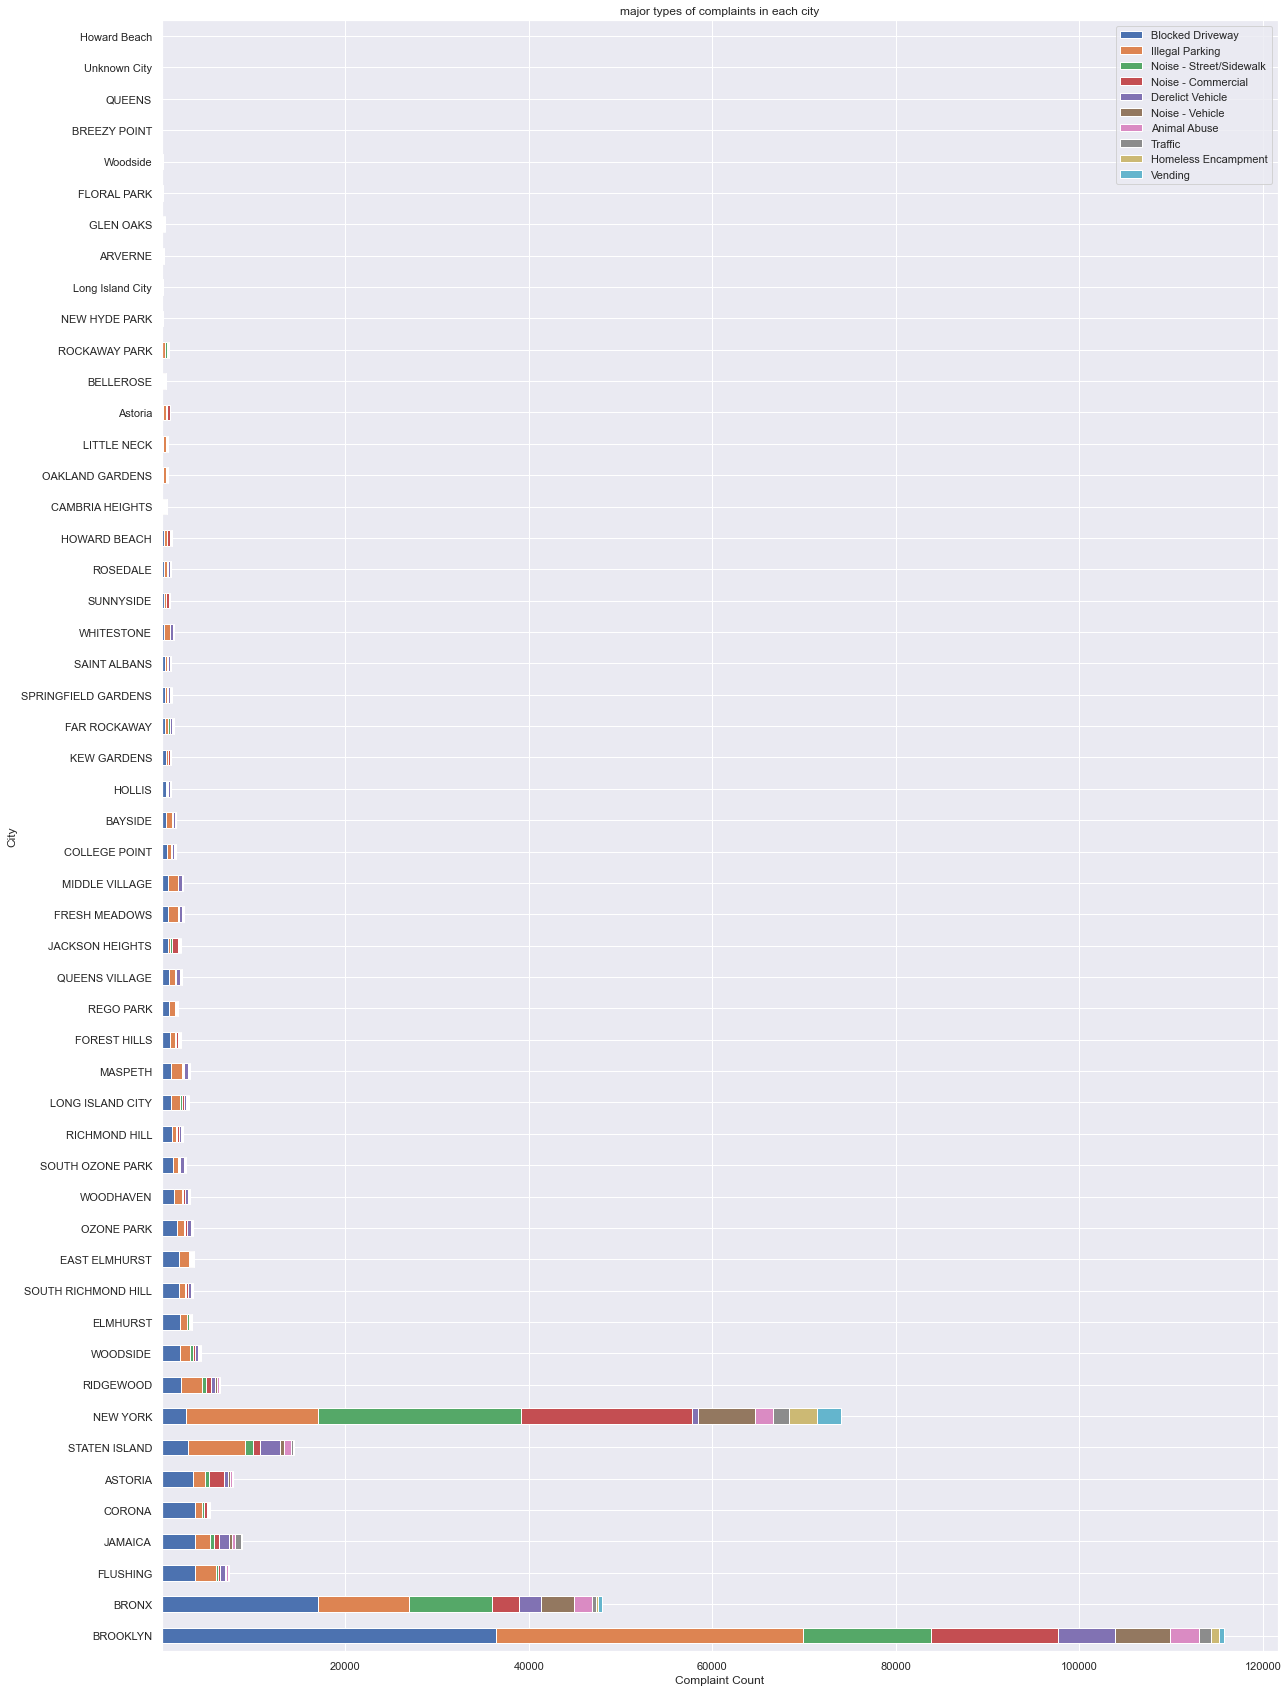

In [46]:
city_major_complaint_dataset.plot(kind = 'barh' , figsize=(20,30), stacked=True, title = "major types of complaints in each city" , xlabel = 'City' , ylabel ='Count')
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

#### Conclusion :

* Above graph shows that the complaint Type = 'Blocked Driveway' is occurring maximum no of times in most of the Cities followded by 'Illegal Parking'

# Task 5. Check if the average response time across various types of complaints

In [47]:
# Create a dataset of average response time for each type of complaint

response_timeDataset = csr_dataframe[['Complaint_Type','Request_Closing_Time_mins']] 
avg_response_time = response_timeDataset.groupby(['Complaint_Type'] , dropna = False)['Request_Closing_Time_mins'].mean().fillna(0).to_frame()
avg_response_time['Complaint_Type']=avg_response_time.index
avg_response_time

,Request_Closing_Time_mins,Complaint_Type
Complaint_Type,,
Animal Abuse,300.851849,Animal Abuse
Bike/Roller/Skate Chronic,215.699928,Bike/Roller/Skate Chronic
Blocked Driveway,270.295141,Blocked Driveway
Derelict Vehicle,421.339650,Derelict Vehicle
Disorderly Youth,206.595913,Disorderly Youth
Drinking,230.066417,Drinking
Graffiti,387.939066,Graffiti
Homeless Encampment,257.912484,Homeless Encampment
Illegal Fireworks,168.705788,Illegal Fireworks


Text(0.5, 1.0, 'Average response time across various types of Complaints')

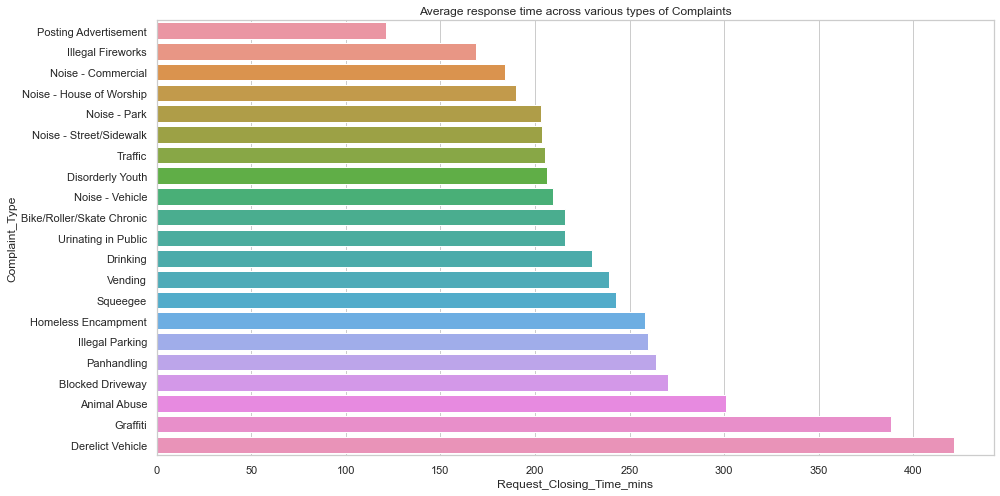

In [48]:
# Draw the average response time across various types of complaints

sns.set_theme(style="whitegrid")
plt.figure(figsize = (15,8))
sns.barplot(y="Complaint_Type", x="Request_Closing_Time_mins",  data=avg_response_time.sort_values('Request_Closing_Time_mins'))
plt.title("Average response time across various types of Complaints")

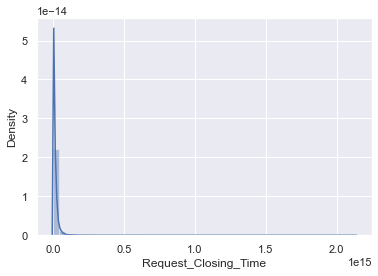

In [49]:
sns.set()
sns.distplot(csr_dataframe.Request_Closing_Time, hist= True)
plt.show()

In [50]:
# Viewing the descriptive statistics on the Processing Time can give some insights on turn around time


mean = response_timeDataset['Request_Closing_Time_mins'].mean()
std = response_timeDataset['Request_Closing_Time_mins'].std()

print('Mean: ',mean)
print('Std: ',std)

response_timeDataset['Request_Closing_Time_mins'].sort_values().tail()


Mean:  251.3445353751121
Std:  349.55569222829376


12168     13402.200000
21268     31155.266667
23664     34641.100000
339204    35232.100000
244488    35572.366667
Name: Request_Closing_Time_mins, dtype: float64

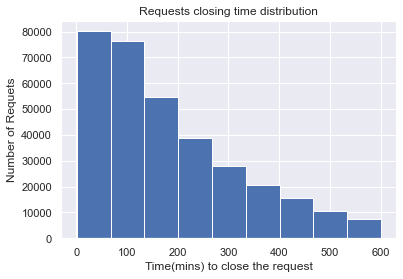

In [51]:
#As we can see, some of the closing times are too high and hence will be dealt as outliers.
#We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1.
#z-statistic = (value-mean)/std
#Next we will plot the histogram of our Request_Closing_Time_mins.

plot_data = response_timeDataset[ ((response_timeDataset['Request_Closing_Time_mins']-mean)/std) < 1]
plot_data['Request_Closing_Time_mins'].hist(bins=9)
plt.xlabel('Time(mins) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()

* Above distribution shows that around half of overall complaints were closed within 2 to 3 hours (within approx 250 minutes) .
* Around 99% of the complaints were closed within 10 (600 mins) hours.

# Hypothesis testing - 

# check if the average response time across complaint types is similar or not (overall)


* Below is the distribution of our Request_Closing_Time_mins data for 'Noise - Street/Sidewalk' complaint type.
* We see a positive skewness in data if we limit the range to 1250As our data contains too many outliers , 
* hence we will transform the data using log transformation

<AxesSubplot:>

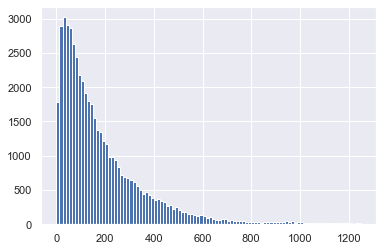

In [52]:
df_data = response_timeDataset[response_timeDataset['Complaint_Type']=='Noise - Street/Sidewalk']['Request_Closing_Time_mins']
df_data.hist(bins=100,range=(0,1250))

In [53]:
df_data.describe()

count    50823.000000
mean       203.627450
std        320.980463
min          2.283333
25%         58.908333
50%        129.750000
75%        254.750000
max      35572.366667
Name: Request_Closing_Time_mins, dtype: float64

* When we look at above statistics, it becomes clear that we have very few but very large values after th 75th percentile.
* we will take the log of Request_Closing_Minutes for each complaint type and store in a dictionary.
* Log transformation removes the skewness from the data.

In [54]:
# apply the log ransformation

dataset = {}
for i in response_timeDataset['Complaint_Type'].unique():
    dataset[i] = np.log(response_timeDataset[response_timeDataset['Complaint_Type']==i]['Request_Closing_Time_mins'])

In [55]:
dataset.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'])

<AxesSubplot:>

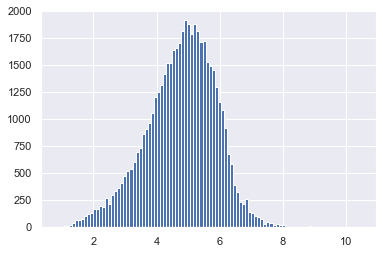

In [56]:
dataset['Noise - Street/Sidewalk'].hist(bins=100)

Above distribution plot shows that once we apply log Transformation to our data, skewness is almost removed and it looks more like a normal distribution.

In [57]:
for i in dataset.keys():
    print(dataset[i].std())

1.1036040708122021
0.9647416380698135
1.0738630624402232
1.2451966392718254
1.0906599622205226
1.1715553703648787
1.225375097478507
1.0793559475623973
1.036449630563194
1.1142164451074161
1.1836120651147704
1.0485525545629217
1.1560390469186679
1.0830431072647795
1.1209874083561666
1.0294588318884546
1.098349150897439
1.0093473489139961
1.034012824402592
1.2135323624143437
0.8472414281382027


Standard deviation for all groups are almost same

* To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.

    * Below conditions should be met before conducting ANOVA.
    * All distributions must follow a normal distributions curve. We have verified this after the log transformation
    * Standard deviation for all groups must be same. Above output proves that this is true.
    * All samples are drawn independently of each other.

* Null Hypothesis: Average response time for all the complaints type is same.

* Alternate Hypothesis: Average response time for all the complaints type is not same and theres is some difference among the groups.

    * Below We conduct ANOVA test for top 5 type of complaints
    * For a 95% of confidence interval we choose our alpha as 0.05 for 5%
    * Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

* if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

* if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [58]:
stat, p = f_oneway(dataset['Noise - Street/Sidewalk'],dataset['Blocked Driveway'],dataset['Illegal Parking'],dataset['Derelict Vehicle'],
                   dataset['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2814.991, p=0.000
Different distributions (reject H0)


* Conclusion - 


Since our p-value is lower tahn alpha, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that
Average response time for all the complaints type is not same.

In [59]:
''' Assignment is completed! '''

' Assignment is completed! '